core           INFO 	Loading data for Hungarian Grand Prix - Race [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '44', '63', '55', '11', '16', '4', '14', '31', '5', '18', '10', '24', '47', '3', '20', '23', '6', '22', '77']


['1', '44', '63', '55', '11', '16', '4', '14', '31', '5', '18', '10', '24', '47', '3', '20', '23', '6', '22', '77']
['VER', 'HAM', 'RUS', 'SAI', 'PER', 'LEC', 'NOR', 'ALO', 'OCO', 'VET', 'STR', 'GAS', 'ZHO', 'MSC', 'RIC', 'MAG', 'ALB', 'LAT', 'TSU', 'BOT']
   Driver  Stint Compound  StintLength
0     ALB    1.0     SOFT            2
1     ALB    2.0   MEDIUM           19
2     ALB    3.0   MEDIUM           19
3     ALB    4.0     SOFT           29
4     ALO    1.0   MEDIUM           21
..    ...    ...      ...          ...
57    VET    2.0   MEDIUM           31
58    VET    3.0   MEDIUM           23
59    ZHO    1.0   MEDIUM           27
60    ZHO    2.0     HARD           24
61    ZHO    3.0     SOFT           18

[62 rows x 4 columns]


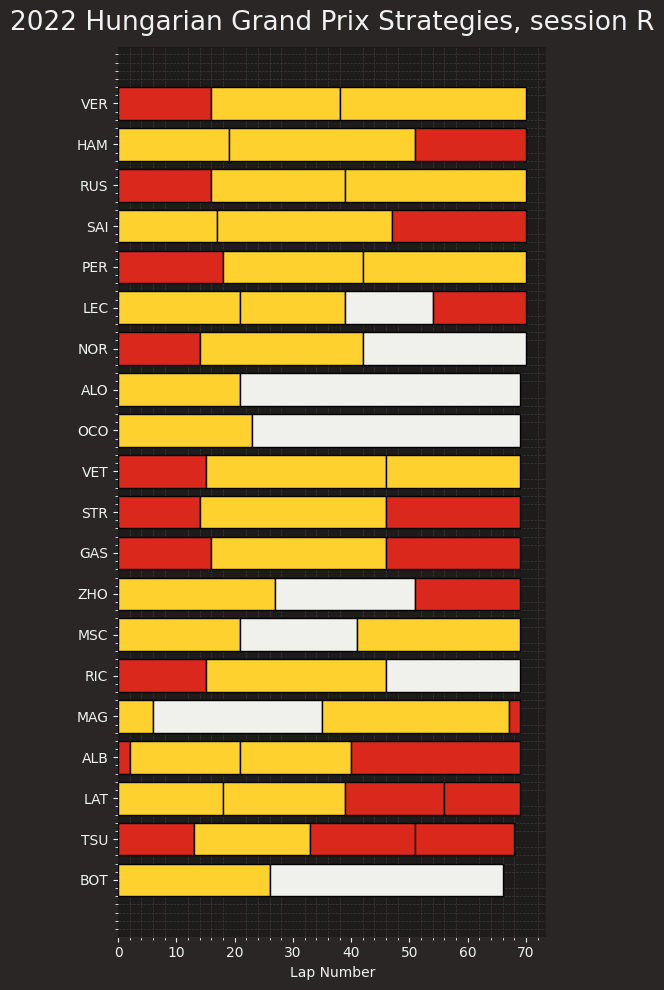

In [9]:
from matplotlib import pyplot as plt

import fastf1
import fastf1.plotting

year = 2022
gran_prix = "Hungarian"
sessionG = 'R'  # Race session

session = fastf1.get_session(year, gran_prix, sessionG)
session.load()
laps = session.laps

drivers = session.drivers
print(drivers)

drivers = [session.get_driver(driver)["Abbreviation"] for driver in drivers]
print(drivers)

stints = laps[["Driver", "Stint", "Compound", "LapNumber"]]
stints = stints.groupby(["Driver", "Stint", "Compound"])
stints = stints.count().reset_index()

stints = stints.rename(columns={"LapNumber": "StintLength"})
print(stints)

fig, ax = plt.subplots(figsize=(5, 10))

for driver in drivers:
    driver_stints = stints.loc[stints["Driver"] == driver]

    previous_stint_end = 0
    for idx, row in driver_stints.iterrows():
        # each row contains the compound name and stint length
        # we can use these information to draw horizontal bars
        compound_color = fastf1.plotting.get_compound_color(row["Compound"],
                                                            session=session)
        plt.barh(
            y=driver,
            width=row["StintLength"],
            left=previous_stint_end,
            color=compound_color,
            edgecolor="black",
            fill=True
        )

        previous_stint_end += row["StintLength"]

plt.title(f"{year} {gran_prix} Grand Prix Strategies, session {sessionG}")
plt.xlabel("Lap Number")
plt.grid(False)
# invert the y-axis so drivers that finish higher are closer to the top
ax.invert_yaxis()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.tight_layout()
plt.show()

c:\Users\dilau\Desktop\TeamProjF1\fasftF1\.venv\Lib\site-packages\fastf1\plotting\_plotting.py:90: FutureWarning: FastF1 will no longer silently modify the default Matplotlib colors in the future.
To remove this warning, explicitly set `color_scheme=None` or `color_scheme='fastf1'` when calling `.setup_mpl()`.
  warnings.warn(
c:\Users\dilau\Desktop\TeamProjF1\fasftF1\.venv\Lib\site-packages\fastf1\plotting\_plotting.py:98: FutureWarning: FastF1 will stop modifying the default Matplotlib settings in the future.
To opt-in to the new behaviour and remove this warning, explicitly set `misc_mpl_mods=False` when calling `.setup_mpl()`.
  warnings.warn(
req         WARNING 	DEFAULT CACHE ENABLED! (1.19 GB) C:\Users\dilau\AppData\Local\Temp\fastf1
core           INFO 	Loading data for Italian Grand Prix - Race [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
re

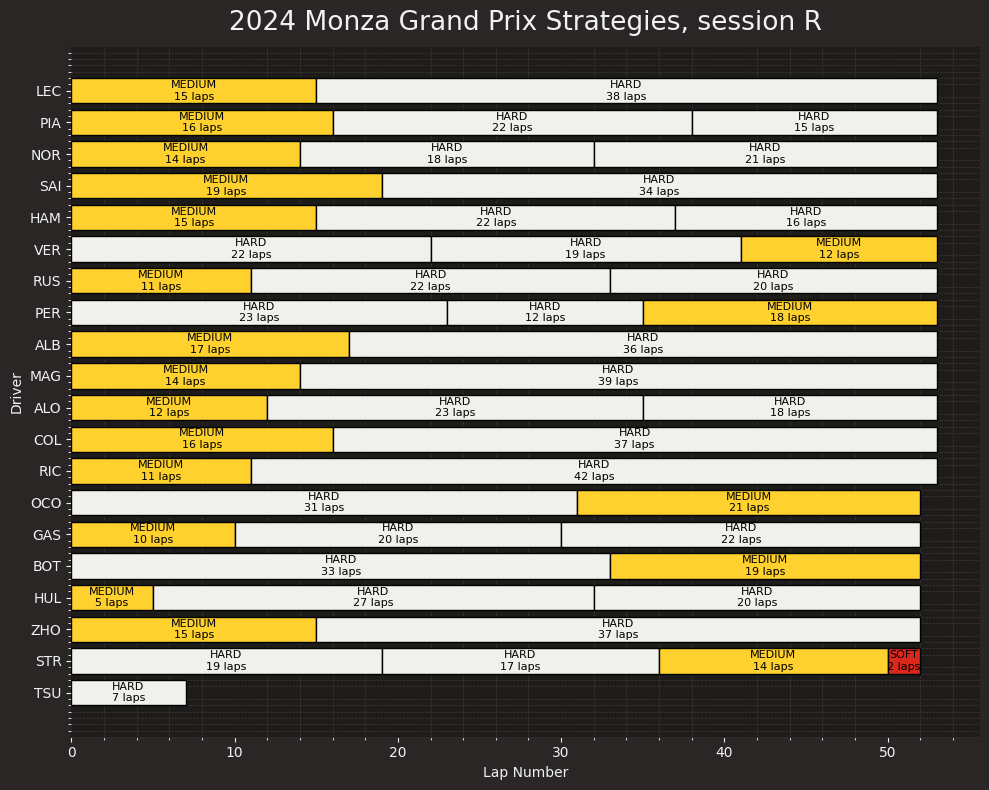

In [1]:
from matplotlib import pyplot as plt
import fastf1
import fastf1.plotting

# Enable cache to speed up data loading (optional)
# fastf1.Cache.enable_cache('cache')

# Set up FastF1 and Matplotlib for better-looking plots
fastf1.plotting.setup_mpl()

# Define the race details
year = 2024
gran_prix = "Monza"
sessionG = 'R'  # Race session 1 letter Q o R

# Load the session data (race, qualifying, etc.)
session = fastf1.get_session(year, gran_prix, sessionG)
session.load()  # Load all the data for this session

# Get all the laps from the session
laps = session.laps

# Get the list of drivers and their abbreviations (e.g., "HAM" for Lewis Hamilton)
drivers = session.drivers
drivers = [session.get_driver(driver)["Abbreviation"] for driver in drivers]

# Prepare stint data: group laps by driver, stint number, and tire compound
stints = laps[["Driver", "Stint", "Compound", "LapNumber"]]
stints = stints.groupby(["Driver", "Stint", "Compound"]).count().reset_index()
stints = stints.rename(columns={"LapNumber": "StintLength"})  # Rename the column to "StintLength"

# Create the plot
fig, ax = plt.subplots(figsize=(10, 8))  # Set the size of the plot

# Plot stints for each driver
for driver in drivers:
    # Get all stints for the current driver
    driver_stints = stints.loc[stints["Driver"] == driver]

    previous_stint_end = 0  # Track where the previous stint ended
    for idx, row in driver_stints.iterrows():
        # Get the color for the tire compound (e.g., red for SOFT, yellow for MEDIUM)
        compound_color = fastf1.plotting.get_compound_color(row["Compound"], session=session)

        # Plot the stint as a horizontal bar
        plt.barh(
            y=driver,  # Driver name on the y-axis
            width=row["StintLength"],  # Length of the stint (number of laps)
            left=previous_stint_end,  # Where the bar starts on the x-axis
            color=compound_color,  # Color of the bar (based on tire compound)
            edgecolor="black",  # Black border around the bar
            fill=True  # Fill the bar with color
        )

        # Add text inside the bar to show the tire compound and stint length
        ax.text(
            x=previous_stint_end + row["StintLength"] / 2,  # Position the text in the middle of the bar
            y=driver,  # Driver name on the y-axis
            s=f"{row['Compound']}\n{row['StintLength']} laps",  # Text to display (e.g., "SOFT\n15 laps")
            ha='center',  # Center the text horizontally
            va='center',  # Center the text vertically
            color='black' if compound_color != 'yellow' else 'black',  # Text color (black for readability)
            fontsize=8  # Font size of the text
        )

        # Update the starting point for the next stint
        previous_stint_end += row["StintLength"]

# Customize the plot
plt.title(f"{year} {gran_prix} Grand Prix Strategies, session {sessionG}")  # Add a title
plt.xlabel("Lap Number")  # Label for the x-axis
plt.ylabel("Driver")  # Label for the y-axis
plt.grid(False)  # Turn off the grid

# Invert the y-axis so the driver who finished first is at the top
ax.invert_yaxis()

# Remove unnecessary borders (spines) around the plot
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Adjust the layout to make everything fit nicely
plt.tight_layout()

# Show the plot
plt.show()